In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
%matplotlib inline

def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newtons method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

## Problem 1

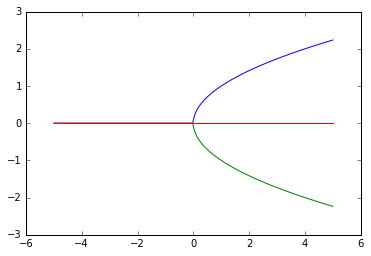

In [2]:
def F(x, lmbda):
    return lmbda*x - x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], -np.sqrt(5), F)
# middle curve
C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], 0, F)

plt.plot(C1,X1)
plt.plot(C2,X2)
plt.plot(C3,X3)
plt.show()

## Problem 2

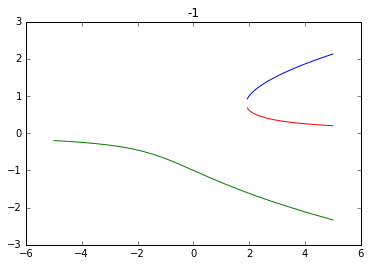

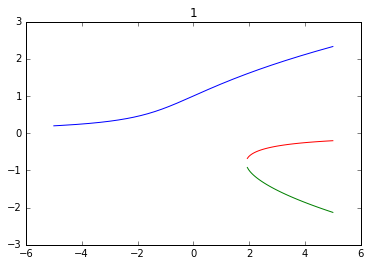

In [4]:
for n in [-1,-.2,.2,1]:
    def F(x, lmbda):
        return n + lmbda*x - x**3

    # Top curve shown in the bifurcation diagram
    C1, X1 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], np.sqrt(5), F)
    # The bottom curve
    C2, X2 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], -np.sqrt(5), F)
    # middle curve
    C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], 0, F)

    plt.plot(C1,X1)
    plt.plot(C2,X2)
    plt.plot(C3,X3)
    plt.title(str(n))

    plt.show()

### Problem 3

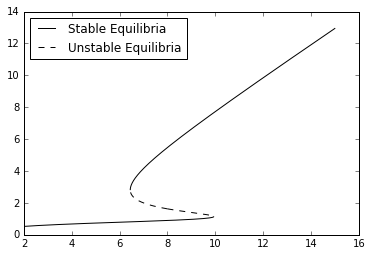

In [16]:
def F(x,k):
    r = 0.56
    return r*x*(1-x/k)-(x**2)/(1+x**2)

 # Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(8, 2, 2000), 2, F)
C2, X2 = EmbeddingAlg(np.linspace(8, 14, 2000), 2.5, F)
C3, X3 = EmbeddingAlg(np.linspace(2, 10, 2000), 3, F)
C4, X4 = EmbeddingAlg(np.linspace(15, 2, 5700), 30, F)


plt.plot(C3,X3,'k', label="Stable Equilibria")
plt.plot(C4,X4,'k')
plt.plot(C1,X1,'k--', label="Unstable Equilibria")
plt.plot(C2,X2,'k--')

plt.legend(loc='upper left')
plt.show()    
    